#Caixa de Edgeworth

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Primeiro, vamos declarar as dotações inicias de cada um dos indivíduos
A = [5, 5]
B = [3, 7]

alpha = 0.7
beta = 0.4

for i in A:
  assert i > 0

for i in B:
  assert i > 0

assert 0 < alpha < 1
assert 0 < beta < 1

In [ ]:
# Agora, vamos definir a função utilidade de ambos
fA = lambda x, y: (x ** alpha) * (y ** (1 - alpha))
fB = lambda x, y: (x ** beta) * (y ** (1 - beta))

tmsA = lambda x, y: alpha/(1 - alpha) * (x / y)
tmsB = lambda x, y: beta/(1 - beta) * (x / y)

excesso = lambda x, y: tmsA - tmsB

In [ ]:
# Note que temos um numero máximo para consumir o bem x e o bem y, logo temos que calcular a factibilidade
omega_x = A[0] + B[0]
omega_y = A[1] + B[1]

# Por agora, vamos criar o grid
grid1 = np.linspace(0, omega_x, 1000)
grid2 = np.linspace(0, omega_y, 1000)

v1, v2 = np.meshgrid(grid1, grid2)


# Temos que calcular a utilidade para cada um dos agentes
uA = fA(v1, v2)
uB = fB(omega_x - v1, omega_y - v2)

# Vamos pegar uma curva de nivel 
uA_nivel = fA(grid1[500], grid2[500])
uB_nivel = fB(grid1[500], grid2[500])

In [ ]:
# Vamos criar a curva de contratos
c = ((1 - alpha) / alpha) * (beta / (1 - beta))

contrato = []

for i in grid1:
  yA = (c * i * omega_y) / (omega_x - i + c * i)

  contrato.append(yA) 

Text(0.5, 1.0, 'Caixa de Edgeworth')

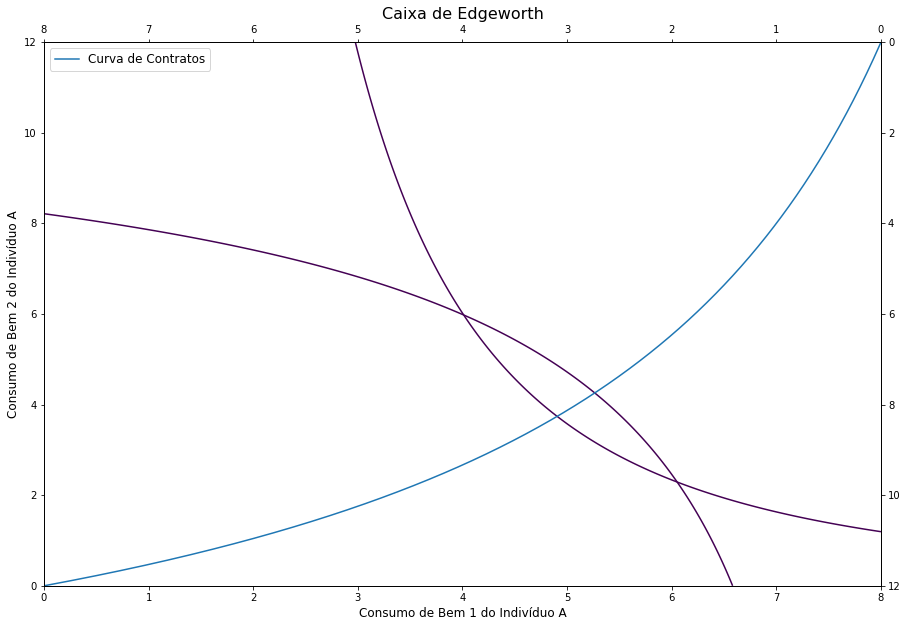

In [ ]:
# Seta a figura e os limites pros eixos
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_xlim(0, omega_x)
ax.set_ylim(0, omega_y)

ax.set_xlabel('Consumo de Bem 1 do Indivíduo A', fontsize = 12)
ax.set_ylabel('Consumo de Bem 2 do Indivíduo A', fontsize = 12)

# Cria um eixo x secundário
ax2 = ax.twinx()
orig_ylim = ax.get_ylim()
ax2.set_ylim(orig_ylim)
ax2.invert_yaxis()

# Cria um eixo y secundário
ax3 = ax.twiny()
orig_xlim = ax.get_xlim()
ax3.set_xlim(orig_xlim)
ax3.invert_xaxis()

# Cria as curvas utilidade e de contrato
ax.contour(v1, v2, uA, levels = [uA_nivel])
ax.contour(v1, v2, uB, levels = [uB_nivel])
ax.plot(grid1, contrato, label = 'Curva de Contratos')

# Dotação Inicial
ax.legend(fontsize = 12)

plt.title('Caixa de Edgeworth', fontsize = 16)